In [9]:
#Lab 6 K means
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
#in CSV u can not have multiple spreadsheet
df1=pd.read_excel("/content/kmean.xlsx",sheet_name="kmeans_data",header=None)
df1

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


In [28]:
df1.shape

(300, 2)

In [29]:
df1.describe()

,0,1
count,300.000000,300.000000
mean,3.684376,2.987101
std,1.925578,1.685078
min,-0.245127,0.205810
25%,2.156202,1.210797
50%,3.231561,2.949738
75%,5.509490,4.807780
max,8.203398,5.784297


In [10]:
#centroids of the clusters -> number the cluster
#define numbers=3
import random
init_centroid=random.sample(range(0,len(df1)),3)
init_centroid


[121, 217, 114]

In [13]:
#identified our centroids to the clusters
centroids=[]
for i in init_centroid:
  centroids.append(df1.iloc[i])


In [14]:
centroids

[0    4.43153
 1    0.54041
 Name: 121, dtype: float64,
 0    6.597022
 1    3.070824
 Name: 217, dtype: float64,
 0    3.161090
 1    1.294229
 Name: 114, dtype: float64]

In [15]:
centroids=np.array(centroids)
centroids

array([[4.43152976, 0.54041   ],
       [6.59702155, 3.07082376],
       [3.16109021, 1.29422893]])

In [16]:
X=np.array(df1)

In [17]:
def calc_distance(i,j):
  return(sum((i-j)**2))**0.5

In [18]:
#for any given datapoint,find out the nearest centroid
def findnearcentroid(centroid,x):
  assignedcluster=[]
  for i in x:
    dist=[]
    for j in centroid:
      dist.append(calc_distance(i,j))
    assignedcluster.append(np.argmin(dist))
  return assignedcluster


In [19]:
get_centroid=findnearcentroid(centroids,X)
get_centroid

[2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [24]:
#getting the new centroid
def calculating_centroid(cluster_number,X):
  new_centroid=[]
  new_df=pd.concat([pd.DataFrame(X),pd.DataFrame(get_centroid,columns=['cluster'])],axis=1)
  for c in set(new_df['cluster']):   #c->0,1,2
    current_cluster=new_df[new_df['cluster']==c][new_df.columns[:-1]]
    cluster_mean=current_cluster.mean(axis=0)
    new_centroid.append(cluster_mean)
  return new_centroid

In [21]:
#pd.concat([pd.DataFrame(X),pd.DataFrame(get_centroid,columns=['cluster'])],axis=1)

,0,1,cluster
0,1.842080,4.607572,2
1,5.658583,4.799964,1
2,6.352579,3.290854,1
3,2.904017,4.612204,2
4,3.231979,4.939894,2
...,...,...,...
295,7.302787,3.380160,1
296,6.991984,2.987067,1
297,4.825534,2.779617,1
298,6.117681,2.854757,1


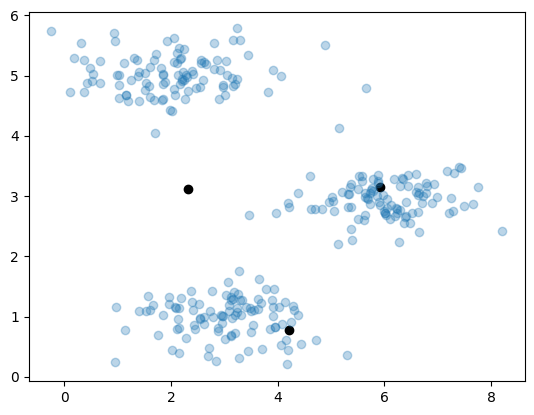

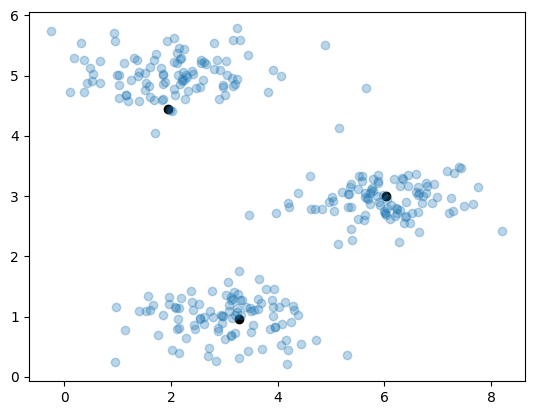

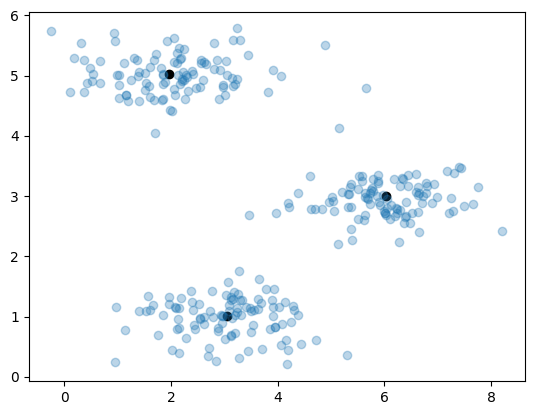

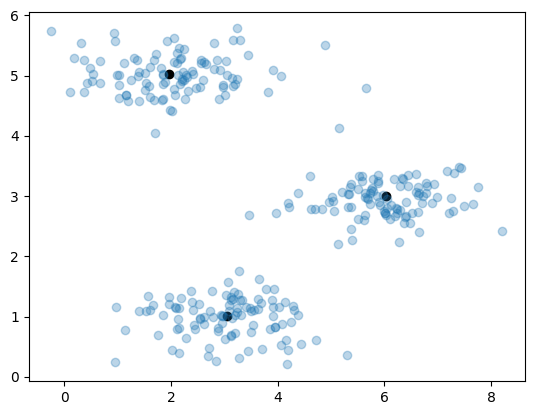

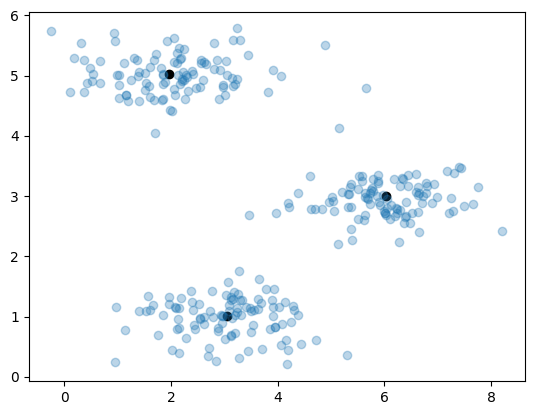

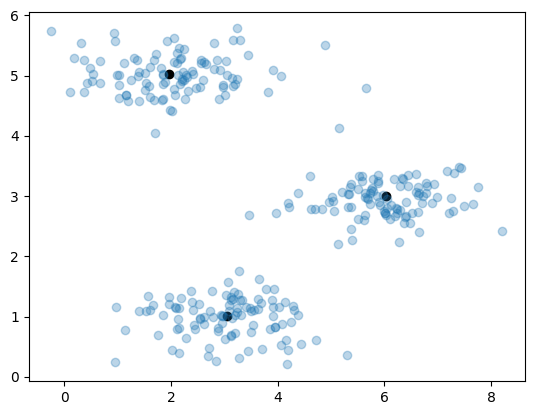

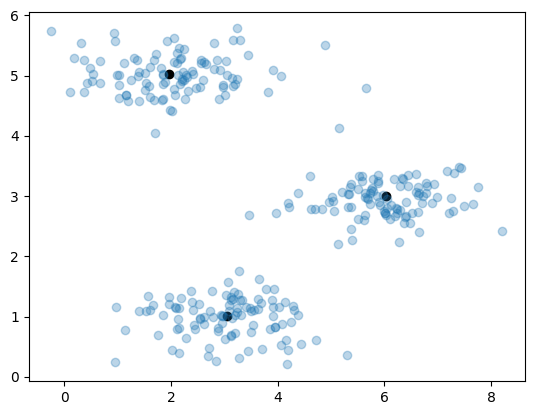

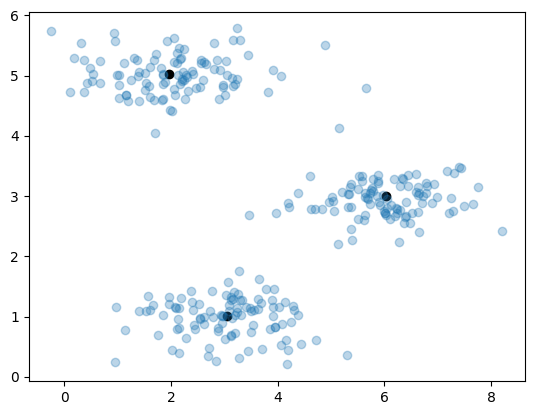

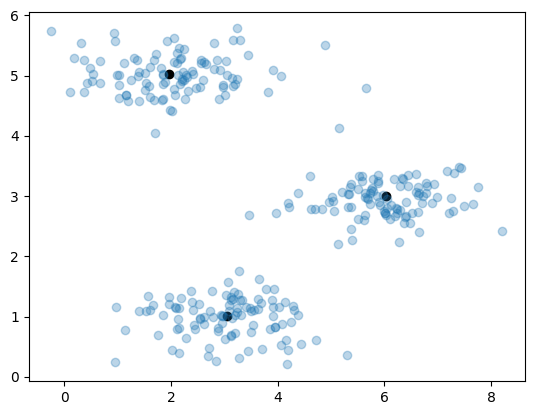

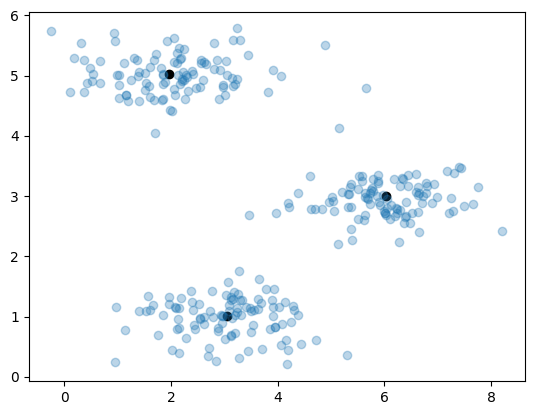

In [25]:
epochs=10
for i in range(epochs):
  get_centroid=findnearcentroid(centroids,X)
  centroids=calculating_centroid(get_centroid,X)
  plt.figure()
  plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],color='black')#plotting the centroid points
  plt.scatter(X[:,0],X[:,1],alpha=0.3) #plotting the observation points
  plt.show()

In [27]:
print(np.array(centroids))

[[3.04367119 1.01541041]
 [6.03366736 3.00052511]
 [1.95399466 5.02557006]]
